### Tensorflow 
- The TensorFlow platform helps you implement best practices for data automation, model tracking, performance monitoring, and model retraining

### Load and Preprocessing Images

In [79]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

print(tf.__version__)

2.10.0


### Download the flowers dataset

In [9]:
import pathlib
datasetUrl = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=datasetUrl,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/Abraham/.keras/datasets/flower_photos')

In [10]:
image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [11]:
images_list = list(data_dir.glob("*/*.jpg"))
images_list

[WindowsPath('C:/Users/Abraham/.keras/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/Abraham/.keras/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/Abraham/.keras/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/Abraham/.keras/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/Abraham/.keras/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('C:/Users/Abraham/.keras/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('C:/Users/Abraham/.keras/datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('C:/Users/Abraham/.keras/datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('C:/Users/Abraham/.keras/datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('C:/Users/Abraham/.keras/datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('C:/Users/

In [12]:
roses = list(data_dir.glob("roses/*"))
roses

[WindowsPath('C:/Users/Abraham/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/Abraham/.keras/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/Abraham/.keras/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/Abraham/.keras/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/Abraham/.keras/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('C:/Users/Abraham/.keras/datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('C:/Users/Abraham/.keras/datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('C:/Users/Abraham/.keras/datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('C:/Users/Abraham/.keras/datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('C:/Users/Abraham/.keras/datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('C:/Use

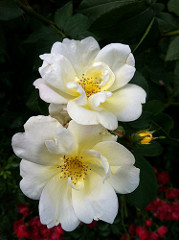

In [13]:
PIL.Image.open(str(roses[0]))

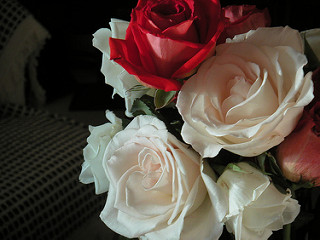

In [17]:
PIL.Image.open(str(roses[1]))

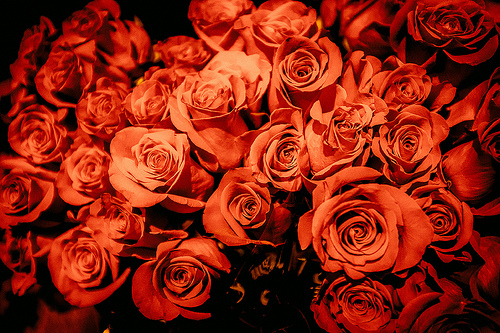

In [20]:
PIL.Image.open(str(roses[2]))

        

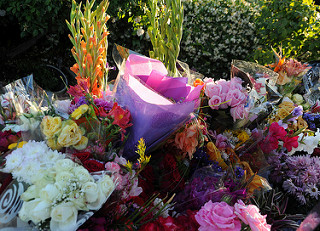

In [23]:
PIL.Image.open(str(roses[3]))

### Load data using a Keras utility
- tf.keras.utils.image_dataset_from_directory
- Create a dataset

In [24]:
batch_size = 32
img_height = 180
img_width = 180


- It's good practice to use a validation split when developing your model.
- You will use 80% of the images for training and 20% for validation

In [27]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
train_ds

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [34]:
classNamesTrain = train_ds.class_names
classNamesTrain

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [37]:
classNamesVal = val_ds.class_names
classNamesVal

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

### Visualize the data
- Here are the first nine images from the training dataset.

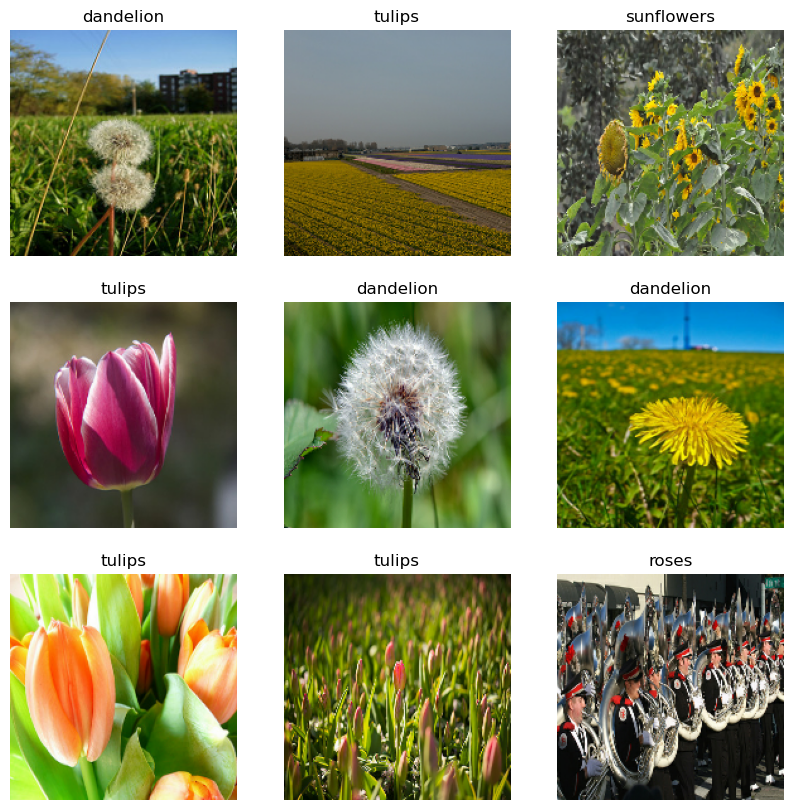

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classNamesTrain[labels[i]])
        plt.axis("off")

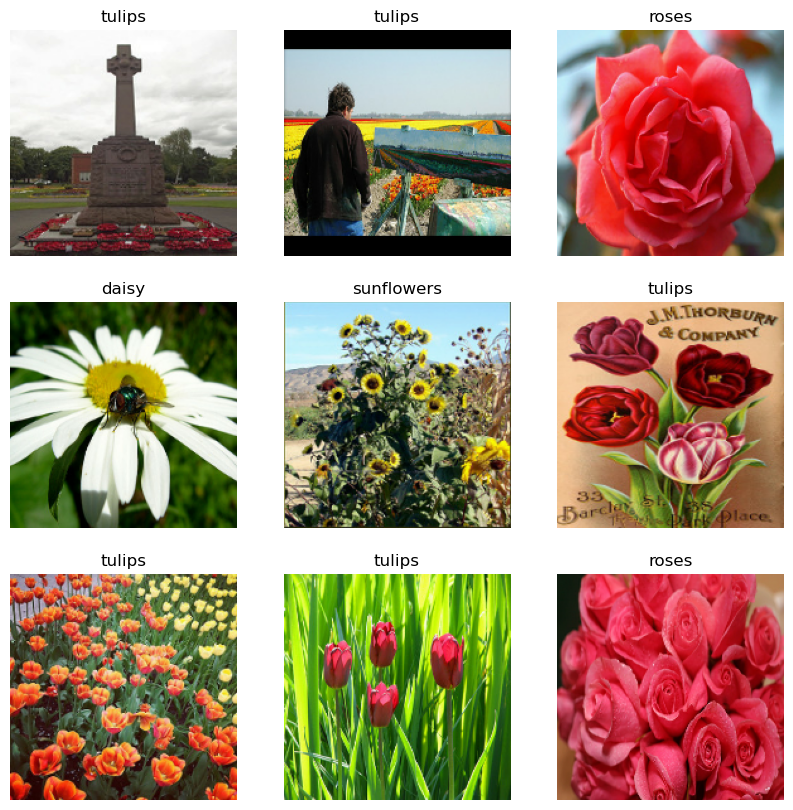

In [38]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classNamesVal[labels[i]])
        plt.axis("off")

In [40]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [42]:
for image_batch,labels_batch in val_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    

(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(30, 180, 180, 3)
(30,)


In [43]:
for image_batch,labels_batch in val_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


- The image_batch is a tensor of the shape (32, 180, 180, 3).
- This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB).
- The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

In [48]:
img_batch = []
labels = []
for image_batch,labels_batch in train_ds:
    img_batch.append(image_batch.shape)
    labels.append(labels_batch.shape)
np.array(img_batch)
    
    

array([[ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 180, 180,   3],
       [ 32, 1

In [49]:
np.array(labels)

array([[32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],
       [32],

### Standardize the data
- The RGB channel values are in the [0, 255] range.
- This is not ideal for a neural network; in general you should seek to make your input values small.
- Here, you will standardize values to be in the [0, 1] range by using tf.keras.layers.Rescaling

In [52]:
# There are two ways to use this layer. You can apply it to the dataset by calling Dataset.map
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalised_ds = train_ds.map(lambda x,y : (normalization_layer(x),y))
image_batch,labels_batch = next(iter(normalised_ds))
firstImage = image_batch[0]
firstImage


<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[0.22549021, 0.1888889 , 0.12156864],
        [0.22289762, 0.18953705, 0.11573531],
        [0.23834422, 0.19405411, 0.12277596],
        ...,
        [0.3391703 , 0.28622913, 0.17969319],
        [0.33591506, 0.2829739 , 0.17643793],
        [0.33202615, 0.27908498, 0.17254902]],

       [[0.2392157 , 0.19215688, 0.11960785],
        [0.24699347, 0.19993463, 0.12738563],
        [0.26059368, 0.20966777, 0.1351852 ],
        ...,
        [0.327451  , 0.2882353 , 0.1764706 ],
        [0.32743466, 0.28821898, 0.17645426],
        [0.3254902 , 0.28627452, 0.17450981]],

       [[0.2529412 , 0.1888889 , 0.11764707],
        [0.26136708, 0.19731483, 0.12607299],
        [0.26981664, 0.21220951, 0.13774511],
        ...,
        [0.3254902 , 0.28692812, 0.17973857],
        [0.3254902 , 0.28692812, 0.17973857],
        [0.3254902 , 0.28692812, 0.17973857]],

       ...,

       [[0.46470597, 0.40130726, 0.29934648],
        [0.45

In [53]:
print(np.min(firstImage))

0.0023856203


In [54]:
print(np.max(firstImage))

0.9902778


In [56]:
firstLabel = labels_batch[0]
print(firstLabel)

tf.Tensor(2, shape=(), dtype=int32)


- Or, you can include the layer inside your model definition to simplify deployment.
- You will use the second approach here.
- Note: If you would like to scale pixel values to [-1,1] you can instead write tf.keras.layers.Rescaling(1./127.5, offset=-1)
- Note: You previously resized images using the image_size argument of tf.keras.utils.image_dataset_from_directory. If you want to include the resizing logic in your model as well, you can use the tf.keras.layers.Resizing layer.

### Configure the dataset for performance
- Dataset.cache keeps the images in memory after they're loaded off disk during the first epoch. 
- Dataset.prefetch overlaps data preprocessing and model execution while training.

In [57]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
train_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [58]:
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### Train a model
- For completeness, you will show how to train a simple model using the datasets you have just prepared.
- The Sequential model consists of three convolution blocks (tf.keras.layers.Conv2D) with a max pooling layer (tf.keras.layers.MaxPooling2D) in each of them.
- There's a fully-connected layer (tf.keras.layers.Dense) with 128 units on top of it that is activated by a ReLU activation function ('relu'). 
- This model has not been tuned in any way—the goal is to show you the mechanics using the datasets you just created.


In [59]:
num_classes = 5
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])
model

- Choose the tf.keras.optimizers.Adam optimizer and tf.keras.losses.SparseCategoricalCrossentropy loss function. 
- To view training and validation accuracy for each training epoch, pass the metrics argument to Model.compile

In [60]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [61]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
92/92 [==============================] - 79s 843ms/step - loss: 1.3160 - accuracy: 0.4046 - val_loss: 1.1148 - val_accuracy: 0.5477
Epoch 2/3
92/92 [==============================] - 73s 788ms/step - loss: 1.0457 - accuracy: 0.5739 - val_loss: 0.9668 - val_accuracy: 0.6431
Epoch 3/3
92/92 [==============================] - 72s 786ms/step - loss: 0.8630 - accuracy: 0.6659 - val_loss: 1.1379 - val_accuracy: 0.5954


### Using tf.data for finer control

In [62]:

list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)
list_ds

<ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [63]:
for f in list_ds.take(5):
    print(f.numpy())

b'C:\\Users\\Abraham\\.keras\\datasets\\flower_photos\\dandelion\\17135145776_4c2ec21b05_m.jpg'
b'C:\\Users\\Abraham\\.keras\\datasets\\flower_photos\\daisy\\13826249325_f61cb15f86_n.jpg'
b'C:\\Users\\Abraham\\.keras\\datasets\\flower_photos\\tulips\\2432389721_4d14971060_n.jpg'
b'C:\\Users\\Abraham\\.keras\\datasets\\flower_photos\\sunflowers\\22419079265_8902cddb7d_n.jpg'
b'C:\\Users\\Abraham\\.keras\\datasets\\flower_photos\\dandelion\\10617191174_9a01753241_n.jpg'


In [64]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)

['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips']


- Split the dataset into training and validation sets:

In [65]:
val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)
val_size

734

In [68]:
print(train_ds)

<SkipDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>


In [67]:
val_ds

<TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [69]:
# You can print the length of each dataset as follows:
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

2936
734


- Write a short function that converts a file path to an (img, label) pair:

In [74]:
def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)

In [75]:
def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  # Resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])


In [76]:
def process_path(file_path):
    label = get_label(file_path)
    # Load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

- Use Dataset.map to create a dataset of image, label pairs:

In [83]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)


TypeError: in user code:


    TypeError: tf__process_path() takes 1 positional argument but 2 were given


In [84]:
for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  2


### Configure dataset for performance
- train a model with this dataset you will want the data
- To be well shuffled.
- To be batched.
- Batches to be available as soon as possible.
- These features can be added using the tf.data

In [85]:
def configure_for_performance(ds):
    ds = ds.cache()
    ds = ds.shuffle(buffer_size=1000)
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

In [86]:
train_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [87]:
val_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

### Visualize the data
- You can visualize this dataset similarly to the one you created previously:

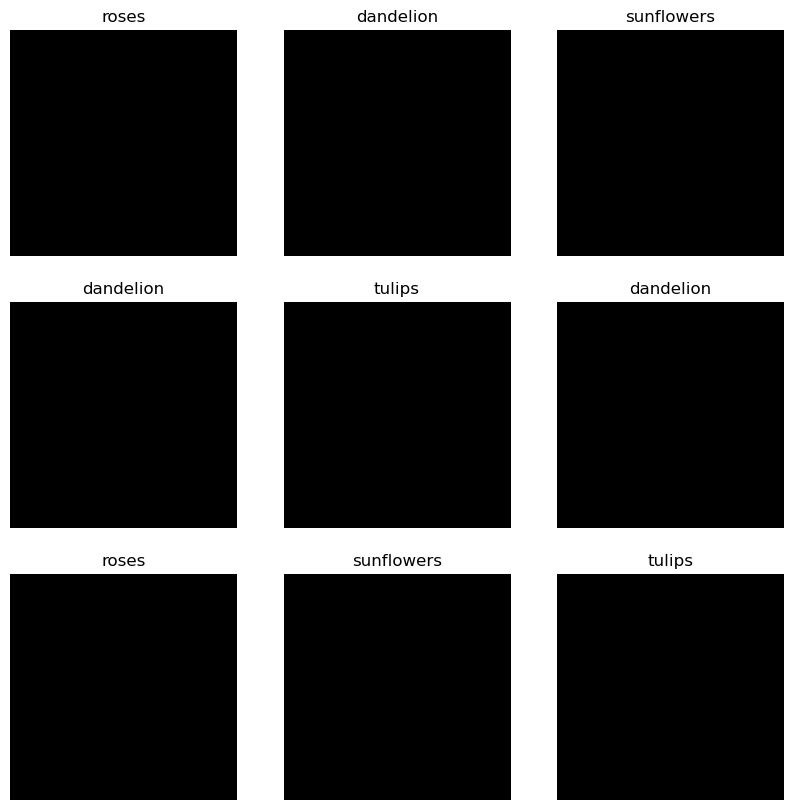

In [92]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = labels_batch[i]
    plt.title(class_names[label])
    plt.axis("off")

### training the model
- You have now manually built a similar tf.data.Dataset to the one created by tf.keras.utils.image_dataset_from_directory above. - You can continue training the model with it.
- As before, you will train for just a few epochs to keep the running time short.

In [93]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
92/92 [==============================] - 83s 878ms/step - loss: 0.7619 - accuracy: 0.7095 - val_loss: 0.7092 - val_accuracy: 0.7275
Epoch 2/3
92/92 [==============================] - 74s 807ms/step - loss: 0.5524 - accuracy: 0.7871 - val_loss: 0.7068 - val_accuracy: 0.7221
Epoch 3/3
92/92 [==============================] - 75s 820ms/step - loss: 0.3823 - accuracy: 0.8617 - val_loss: 0.7671 - val_accuracy: 0.7262


### Using TensorFlow Datasets
- As you have previously loaded the Flowers dataset off disk, let's now import it with TensorFlow Datasets.

In [94]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Abraham\tensorflow_datasets\tf_flowers\3.0.1.incompleteL7LBZ4\tf_flowers-train.tfrecord*...…

Dataset tf_flowers downloaded and prepared to C:\Users\Abraham\tensorflow_datasets\tf_flowers\3.0.1. Subsequent calls will reuse this data.


In [95]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


- Retrieve an image from the dataset:

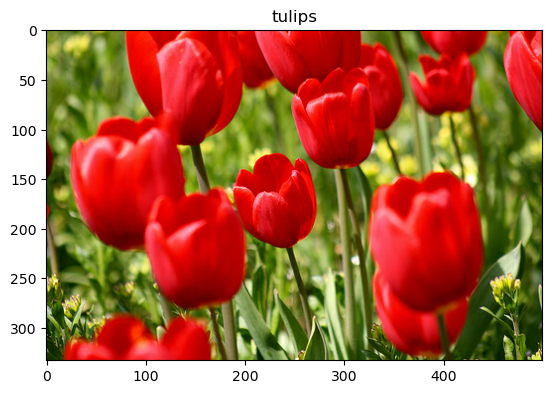

In [96]:
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

- As before, remember to batch, shuffle, and configure the training, validation, and test sets for performance:

In [98]:
train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)
test_ds = configure_for_performance(test_ds)
train_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, None), dtype=tf.int64, name=None))>

In [99]:
val_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, None), dtype=tf.int64, name=None))>

In [100]:
test_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, None), dtype=tf.int64, name=None))>